[0.7, 0.7, 0.7, 0.7, 0.7, 0.7]
--------------interval is : 100
--------------interval is : 100
--------------interval is : 50
--------------interval is : 25
--------------interval is : 50
--------------interval is : 50
    allTemp     koriginal
0     296.0  7.084973e+21
36    296.0  1.767991e+22
17    296.0  1.767991e+22
51    296.0  9.068948e+21
37    300.0  1.712718e+22
..      ...           ...
32   1700.0  3.932115e+18
16   1800.0  6.687497e+18
33   1800.0  2.753218e+18
34   1900.0  1.960724e+18
35   2000.0  1.418067e+18

[103 rows x 2 columns]


c:\Users\renxinrui\Documents\Wmp\rxr\overall\Utils\fit.py:121: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  rangeGap = np.array(rangeGap)


[ 1.88407761e+25 -1.99996258e+00 -1.41376907e+03]
sum_error**2 9.959296561906376
popt: [ 1.88407761e+25 -1.99996258e+00 -1.41376907e+03]
系数A: 1.8840776118903757e+25
系数n: -1.9999625846817333
系数EA: -1413.7690665197938
系数协方差: [[ 1.18221046e-43 -5.93559486e-24 -2.69797349e-20]
 [-5.93559486e-24  4.14379368e-04  1.35458789e+00]
 [-2.69797349e-20  1.35458789e+00  6.15716167e+03]]
参数标准差: [3.43832876e-22 2.03563103e-02 7.84675836e+01]
RSE: 0.9032427262568639
RSE2: 0.9032427262568639
std: 0.3109513257957578
系数yvals: [22.36758931 21.60605642 21.10524397 20.74222041 20.46214074 20.23651757
 20.04893775 19.88920314 19.75060185 19.62851159 19.51963021 19.42152622
 19.33236317 19.25072377 19.17549364 19.1057823  19.040868   18.98015836
 18.92316169 18.86946581 18.81872199 18.77063282 18.72494275]


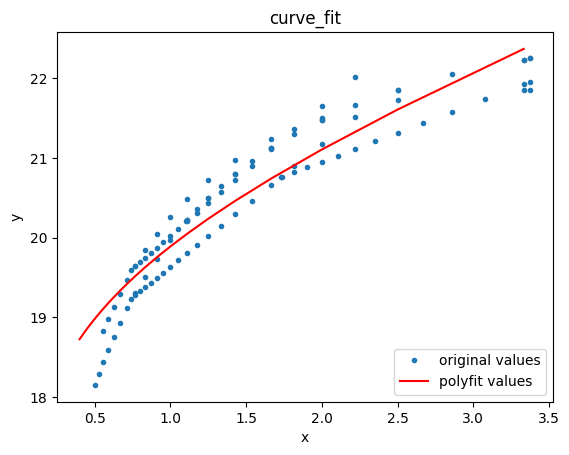

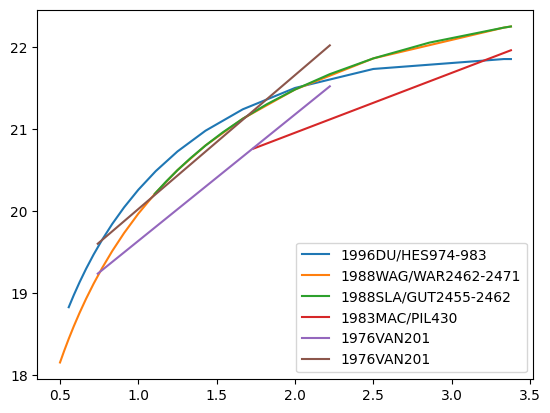

want to find  CH3+CH3(+M)<=>C2H6(+M)
TT find it  CH3+CH3(+M)<=>C2H6(+M)                                       +9.5000000E+014 -5.3800000E-001 +1.7900000E+002   !\Baulch DL Bowman CT Cobos CJ Cox RA Just Th Kerr JA Pilling MJ Stocker D Troe J Tsang W Walker RW Warnatz J JPCRD 34:757-1397 2005

CH3 CH3( C2H6( M)
hen find it  2CH3(+M)=C2H6(+M)


In [5]:
from Utils.DataConvert_thridbody import ConvertData
from Utils.fit import Fit
from Utils.FindReaction import FindReaction
from Utils.Format import Format
from Utils.GetFileDir import GetFileDir
from Utils.GetReactionNum import GetReactionNum
import math

reactionnum = GetReactionNum()
excelname = GetFileDir(reactionnum,'forwardexcel')
outname = GetFileDir(reactionnum,'forwardtxt')

#转换web excel数据到txt文件
ConvertData(excelname, outname, needorder=3, reactiontype='thridbody')

#拟合数据
A,n,EAR = Fit(outname,reactionnum)
K0 = 0
#把拟合的数据写入文件
fd = open(outname,'a+')
fitoneLine = Format('fit','fit',300,2500,A,n,EAR,K0)
fd.write(fitoneLine) 

#把TT和henrry数据写入文件,根据excel的名字来找到反应
ttdata,hendata = FindReaction(excelname,needtype='LOW',henryname='2CH3(+M)=C2H6(+M)')
A = float(ttdata[0])
n = float(ttdata[1])
EA = float(ttdata[2])
EAR = EA/1.987
K0 = 0
ttoneLine = Format('Compare','taotao',300,2500,A,n,EAR,K0)
fd.write(ttoneLine) 

#有可能找不到henry的数据
if(len(hendata) != 0):
    A = float(hendata[0])
    n = float(hendata[1])
    EA = float(hendata[2])
    EAR = EA/1.987
    K0 = 0
    henoneLine = Format('0','henry',300,2500,A,n,EAR,K0)
    fd.write(henoneLine)
fd.close()

